# Predicting loan default rate

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

Link: https://www.kaggle.com/c/home-credit-default-risk

A short description of the problem taken from kaggle website.

The objective of the competiton is to use alternative data to predict their applicant's repayment abilities.

This is supervised binary classification task.

Label 0:Will repay loan on time

Label 1:Will have difficult paying loan


## Importing necessary libraries

In [1]:
# importing necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For plots
%matplotlib inline

## Read the data

In [2]:
train = pd.read_csv("F:/DCU Study/MCM practicum/Data/application_train.csv")
test = pd.read_csv("F:/DCU Study/MCM practicum/Data/application_test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Lets look at spread of target label

In [3]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### It is evident from above that it's imbalanced dataset

In [6]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 122)
The test dataset dimensions are as follows: (48744, 121)


### Target label is the missing column in the test dataset

### Lets see the missing values in the dataset

In [7]:
def missing_values(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values.
    
    """
    
    # variable to hold missing values
    missing_val = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values 
    missing_val_pc = 100 * missing_val/len(dataframe)
    
    # new dataframe to hold a missing data
    concat_val = pd.concat([missing_val,missing_val_pc.round(1)],axis=1)
   
    # give new col names
    concat_val.columns = ['Missing Count','Missing Count %']
    

    return concat_val[concat_val.iloc[:,1]!=0]

In [8]:
missing_values(train)

,Missing Count,Missing Count %
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [6]:
missing_values(test)

,Missing Count,Missing Count %
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
COMMONAREA_MODE,33495,68.7
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_AVG,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_MODE,32780,67.2


### These missing values must be handled

Lets look at the datatypes in dataset

In [4]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts()))

Train dataset: 
float64    65
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64


### There are 16 objects in both datasets , lets see them

In [9]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Next we need to handle these categorical variables

Proceeding with encoding methods Label Encoding and One hot encoding 

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
counter = 0

# iterate through the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        

        counter+=1
        
print("Label encoded {} columns.".format(counter))

Label encoded 4 columns.


In [6]:
# one-hot encode of categorical variables
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

### Checking for new column due to one-hot encoding

In [7]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 230)
Testing Features shape:  (48744, 226)


### Lets align the test dataset to counter the mismatch

In [8]:
# collect the target labels to support the aligning 
target = train['TARGET']

In [9]:
train, test = train.align(test,axis=1,join='inner')

In [10]:
train['TARGET'] = target

In [11]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 227)
Testing Features shape:  (48744, 226)


### Handling the anamolies

 On examination of the dataset it was observed that Days_employed column has some unexpected values.

In [12]:
# The column is in days so divide by 365
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

The max value is 1000. People can't be employed for 1000 years. Lets see the number of anomalies and their target values of these people.

In [13]:
# People who are employed for more than 100 years (anomalies)
anoms = train[(train['DAYS_EMPLOYED']/365>=100)]
(anoms['DAYS_EMPLOYED']==365243).count()

55374

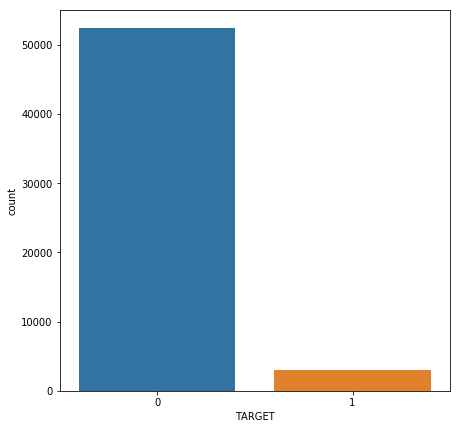

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(x='TARGET',data=anoms)

It is evident from the above that majority have repayed their loan on time and few defaulted. There is no precise standard as of yet to handle these anomalies and the approach depends on the dataset. Since all the anomalies have the same value the safest approcah is to set them as missing and having them imputed at end.


In [14]:
# Replacing anamolies with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

Text(0.5, 0, 'Years worked before application')

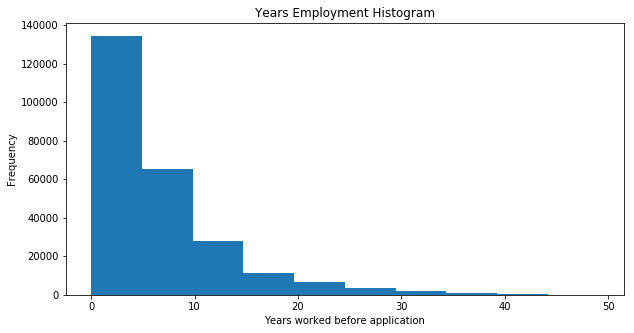

In [21]:
plt.figure(figsize=(10,5))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [15]:
# Doing the same for test dataset
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

## Feature Engineering

According this article by Wells Fargo
https://www.wellsfargo.com/financial-education/credit-management/five-c/ 

The major factors the banks consider before issuing loans are these:

### Credit History 
This contains detailed report of credit transactions, this information is obtained from lenders who are owed credit. The credit report generally contains lender names, type of credit, payment history .
#### Capacity 
The ability of the payee to pay the debt owed is assessed here. Income and employment history are good indicators. The ratio between current debt and any new debt will also be considered .
#### Collateral
If the loan is secured the value of asset mortgaged is evaluated against the capital of loan for feasibility.
#### Capital 
Balance in banks accounts, financial investments and other assets are considered as capital. This assessed in any unforeseen setback faced by the customer .
#### Conditions 
It is of interest to the lenders to know the purpose of the loan and how the loan money will be utilized.

Let us try to incorporate these features to the dataset

#### Credit to income - > Credit amount/Total income
#### Annuity to income -> Loan annuity/Total income
#### Days Employed to age -> Days employed/Applicant age


In [16]:
train['CTI'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['ATI'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ETA'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [17]:
test['CTI'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
test['ATI'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
test['ETA'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

## Lets see the correlation of these variables wrt Target variable
Top 5 most positively and negatively correlated features are

In [18]:
cor = train.corr()['TARGET']

In [19]:
print(cor.sort_values().tail(5))
cor.sort_values().head(5)

REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
ETA                                    -0.067955
NAME_EDUCATION_TYPE_Higher education   -0.056593
Name: TARGET, dtype: float64

#### The feature engineered features did not make it into the list,lets see their correlation

In [20]:
cor.tail(3)

CTI   -0.007727
ATI    0.014265
ETA   -0.067955
Name: TARGET, dtype: float64

## Handling Missing values

### Imputing the missing values in each columns

In [21]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
features = list(set(train.columns).difference({'TARGET'}))

In [24]:
imputer = SimpleImputer(strategy="median")

The missing values are imputed based on median value.

## Feature Selection - Select From Model

Its the process of selecting a subset of features to passed on to the model instead of original dataset.This is done as to save computation resource. More the number of features the more likely to overfit the data and difficult interpretation of the model. If there are few features then model is easy to interpret and less likely to overfit but lower accuracy.

The strategy is to remove features which is above a certain threshold.



In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [144]:
select.fit(x_training_set, y_training_set)
x_train_s = select.transform(X_training_set)
print('The shape of X_train is: ', x_training_set.shape)
print('The shape of X_train_s is ', x_train_s.shape)

The shape of X_train is:  (215257, 229)
The shape of X_train_s is  (215257, 115)


In [148]:
x_valid_s = select.transform(x_validation_set)

### But reducing the number of features it was observed that accuracy of the models are getting reduced. So proceeding without feature selection.

### Normalising features or Feature Scaling

Its done to normalise the range of variables or features as few objective functions will not work without properly normalisation and gradient descent coverges much faster with feature scaling.

In [25]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [26]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [27]:
imputer.fit(train.drop(['TARGET'],axis=1))

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [28]:
train_new = imputer.transform(train.drop(['TARGET'],axis=1))

In [29]:
test_new = imputer.transform(test)

In [30]:
train_new = scaler.fit_transform(train_new)

In [31]:
test_new = scaler.fit_transform(test_new)

In [32]:
train_new.shape

(307511, 229)

In [33]:
test_new.shape

(48744, 229)

## Splitting data into training and testing set

In [34]:
from sklearn.model_selection import train_test_split

x_training_set, x_validation_set, y_training_set, y_validation_set = train_test_split(train_new, 
                                                                                      target, test_size=0.3, random_state=42)

### Understanding the metrics

#### Accuracy: 
 Accuracy  refers to correct predictions made to overall predictions.
 
#### Precision :
 Precision refers to positive predictions made which are correct.
 
#### Recall :
 Recall refers to percentage of positive predictions.
 
#### F1 score
 This is harmonious average of precision and recall.

## Model building

### 1) Naive Bayes Classisfier

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
bayes = GaussianNB()

In [37]:
bayes.fit(x_training_set,y_training_set)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
bayes_pred = bayes.predict(x_validation_set)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy  is : ", accuracy_score(y_validation_set,bayes_pred))
print("\n")
print("The classification report is :\n", classification_report(y_validation_set,bayes_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,bayes_pred))

The accuracy  is :  0.1956337936566436


The classification report is :
               precision    recall  f1-score   support

           0       0.95      0.13      0.23     84841
           1       0.08      0.92      0.16      7413

   micro avg       0.20      0.20      0.20     92254
   macro avg       0.52      0.53      0.19     92254
weighted avg       0.88      0.20      0.23     92254

ROC AUC score is:  0.5267890921654254


In [74]:
bayes_test = bayes.predict(test_new)

In [45]:
pd.DataFrame({'target':bayes_test})['target'].value_counts()

0    37309
1    11435
Name: target, dtype: int64

In [46]:
bayes_prob = bayes.predict_proba(test_new)

In [47]:
file_nb=test[['SK_ID_CURR']]
file_nb['Probability']=bayes_prob[:,1]
file_nb.to_csv("naive_bayes.csv",index=False)

## 2) Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 2)

In [42]:
lr.fit(x_training_set,y_training_set)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
lr_pred = lr.predict(x_validation_set)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy  is : ", accuracy_score(y_validation_set,lr_pred))
print("\n")
print("The classification report is:\n", classification_report(y_validation_set,lr_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,lr_pred))

The accuracy  is :  0.9195482038719188


The classification report is:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.48      0.01      0.02      7413

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.70      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254

ROC AUC score is:  0.5055485282089468


In [76]:
lr_test=lr.predict(test_new)

In [53]:
pd.DataFrame({'target':lr_test})['target'].value_counts()

0    48644
1      100
Name: target, dtype: int64

In [54]:
lr_prob = lr.predict_proba(test_new)

In [55]:
file_lr=test[['SK_ID_CURR']]
file_lr['Probability']=lr_prob[:,1]
file_lr.to_csv("logistic_regression.csv",index=False)

## 3) Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [47]:
rf.fit(x_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [48]:
rf_pred = rf.predict(x_validation_set)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    7.3s finished


In [49]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy  is : ", accuracy_score(y_validation_set,rf_pred))
print("\n")
print("The classification report is :\n", classification_report(y_validation_set,rf_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,rf_pred))

The accuracy  is :  0.9196999588093742


The classification report is :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.78      0.00      0.00      7413

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.85      0.50      0.48     92254
weighted avg       0.91      0.92      0.88     92254

ROC AUC score is:  0.5004603567775878


In [77]:
rf_test=rf.predict(test_new)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.7s finished


In [62]:
pd.DataFrame({'target':rf_test})['target'].value_counts()

0    48743
1        1
Name: target, dtype: int64

In [81]:
rf_prob = lr.predict_proba(test_new)

In [64]:
file_rf=test[['SK_ID_CURR']]
file_rf['Probability']=lr_prob[:,1]
file_rf.to_csv("Random_Forest.csv",index=False)

## 4) LightGBM by Microsoft

In [50]:
import lightgbm as lgb

In [51]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [52]:
lgbm.fit(x_training_set,y_training_set)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=40, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
lgbm_pred=lgbm.predict(x_validation_set)

In [54]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy is : ", accuracy_score(y_validation_set,lgbm_pred))
print("\n")
print("The classification report is :\n", classification_report(y_validation_set,lgbm_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,lgbm_pred))

The accuracy is :  0.919927591215557


The classification report is :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.55      0.02      0.04      7413

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.74      0.51      0.50     92254
weighted avg       0.89      0.92      0.88     92254

ROC AUC score is:  0.508894137049911


In [78]:
lgbm_test=lgbm.predict(test_new)

In [72]:
pd.DataFrame({'target':lgbm_test})['target'].value_counts()

0    48498
1      246
Name: target, dtype: int64

In [73]:
lgbm_prob=lgbm.predict_proba(test_new)

In [74]:
file_lgbm=test[['SK_ID_CURR']]
file_lgbm['Probability']=lgbm_prob[:,1]
file_lgbm.to_csv("LightGBM.csv",index=False)

## 5) XGBoost

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(n_estimators=250,max_depth=5)

In [57]:
xgb.fit(x_training_set,y_training_set)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [58]:
xgb_pred = xgb.predict(x_validation_set)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,xgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,xgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,xgb_pred))

The accuracy in general is :  0.919862553385219


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.53      0.03      0.05      7413

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.72      0.51      0.50     92254
weighted avg       0.89      0.92      0.89     92254

ROC AUC score is:  0.5116287832393878


In [46]:
xgb_test=xgb.predict(test_new)

In [47]:
pd.DataFrame({'target':xgb_test})['target'].value_counts()

0    48584
1      160
Name: target, dtype: int64

In [49]:
xgb_prob=xgb.predict_proba(test_new)

In [50]:
file_xgb=test[['SK_ID_CURR']]
file_xgb['Probability']=xgb_prob[:,1]
file_xgb.to_csv("XGBoost.csv",index=False)

In [66]:
xgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':xgb.feature_importances_})

In [85]:
sorted_importance = xgb_feature_importance_df.sort_values(by='Importance',ascending=False)

In [86]:
sorted_importance.head(10)

,Feature,Importance
33,REG_CITY_NOT_WORK_CITY,0.030741
32,OCCUPATION_TYPE_Laborers,0.029179
122,ENTRANCES_AVG,0.018959
109,FLAG_DOCUMENT_17,0.017178
84,DAYS_BIRTH,0.017174
223,ORGANIZATION_TYPE_Postal,0.015943
41,ORGANIZATION_TYPE_Industry: type 8,0.014613
2,ORGANIZATION_TYPE_Cleaning,0.013688
125,NAME_HOUSING_TYPE_With parents,0.013413
118,ORGANIZATION_TYPE_Trade: type 7,0.012255


In [71]:
xgb_feature_importance_df.head(10)

,Feature,Importance
0,FONDKAPREMONT_MODE_reg oper spec account,0.003670
1,NAME_FAMILY_STATUS_Separated,0.008563
2,ORGANIZATION_TYPE_Cleaning,0.013688
3,ORGANIZATION_TYPE_Housing,0.003245
4,CTI,0.004111
5,ORGANIZATION_TYPE_School,0.003906
6,OCCUPATION_TYPE_Core staff,0.008757
7,LIVINGAPARTMENTS_MODE,0.007720
8,ORGANIZATION_TYPE_Realtor,0.010857
9,FLOORSMIN_MODE,0.003721


## 6) Ensemble Modelling

In [60]:
# Stacked Model
from scipy import stats
def stacked_model(x_training_set):
    """
    This method performs the stacked ensambling of all the models - XGBoost, LGBoost, Random forest, 
    Naive Bayes,Logistic Regression.
    """  
    stacked_predictions = np.array([])

    for element in x_training_set:
         stacked_predictions = np.append(stacked_predictions,stats.mode(element)[0][0])

    return stacked_predictions

In [61]:
ensemble_array = (pd.DataFrame({'LR':lr_pred,
                                'XGB':xgb_pred,
                                'LGB':lgbm_pred,
                                'RF':rf_pred,
                                'Bayes':bayes_pred}).values)

In [62]:
ensemble_test = (pd.DataFrame({'LR':lr_test,
                                'XGB':xgb_test,
                                'LGB':lgbm_test,
                                'RF':rf_test,
                                'Bayes':bayes_test}).values)

NameError: name 'lr_test' is not defined

In [63]:
ensemble_pred = stacked_model(ensemble_array)

In [64]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,ensemble_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,ensemble_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,ensemble_pred))

The accuracy in general is :  0.9199167515771673


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.56      0.02      0.03      7413

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.74      0.51      0.50     92254
weighted avg       0.89      0.92      0.88     92254

ROC AUC score is:  0.507903352490092


In [82]:
ensemble_new = stacked_model(ensemble_test).astype(int)

In [83]:
pd.DataFrame({'target':ensemble_new})['target'].value_counts()


0    48714
1       30
Name: target, dtype: int64